In [14]:
import requests
import pandas as pd

# Toronto Open Data API base URL
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Retrieve metadata for the specified package
url = base_url + "/api/3/action/package_show"
params = {"id": "toronto-beaches-water-quality"}

def get_package_metadata(url, params):
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve package metadata: {response.status_code}")
        return None

def get_resource_data(resource):
    if resource["datastore_active"]:
        # Retrieve all records in CSV format
        csv_url = base_url + "/datastore/dump/" + resource["id"]
        return pd.read_csv(csv_url)
    else:
        print(f"Resource {resource['id']} is not datastore active")
        return None

package = get_package_metadata(url, params)

if package:
    # Assume the first resource is the one we want
    resource = package["result"]["resources"][0]
    df = get_resource_data(resource)
    if df is not None:
        print("First few rows of the dataset:")
        print(df.head())
        print("\nColumn Names:", df.columns)
else:
    print("No package data found")


First few rows of the dataset:
   _id  beachId                     beachName siteName collectionDate  eColi  \
0    1        1  Marie Curtis Park East Beach      29W     2024-08-02    NaN   
1    2        1  Marie Curtis Park East Beach      33W     2024-08-02    NaN   
2    3        1  Marie Curtis Park East Beach      32W     2024-08-02    NaN   
3    4        1  Marie Curtis Park East Beach      31W     2024-08-02    NaN   
4    5        1  Marie Curtis Park East Beach      30W     2024-08-02    NaN   

  comments                                           geometry  
0      NaN  {"type": "Point", "coordinates": [-79.539696, ...  
1      NaN  {"type": "Point", "coordinates": [-79.540886, ...  
2      NaN  {"type": "Point", "coordinates": [-79.54056, 4...  
3      NaN  {"type": "Point", "coordinates": [-79.54039, 4...  
4      NaN  {"type": "Point", "coordinates": [-79.540054, ...  

Column Names: Index(['_id', 'beachId', 'beachName', 'siteName', 'collectionDate', 'eColi',
       'comm

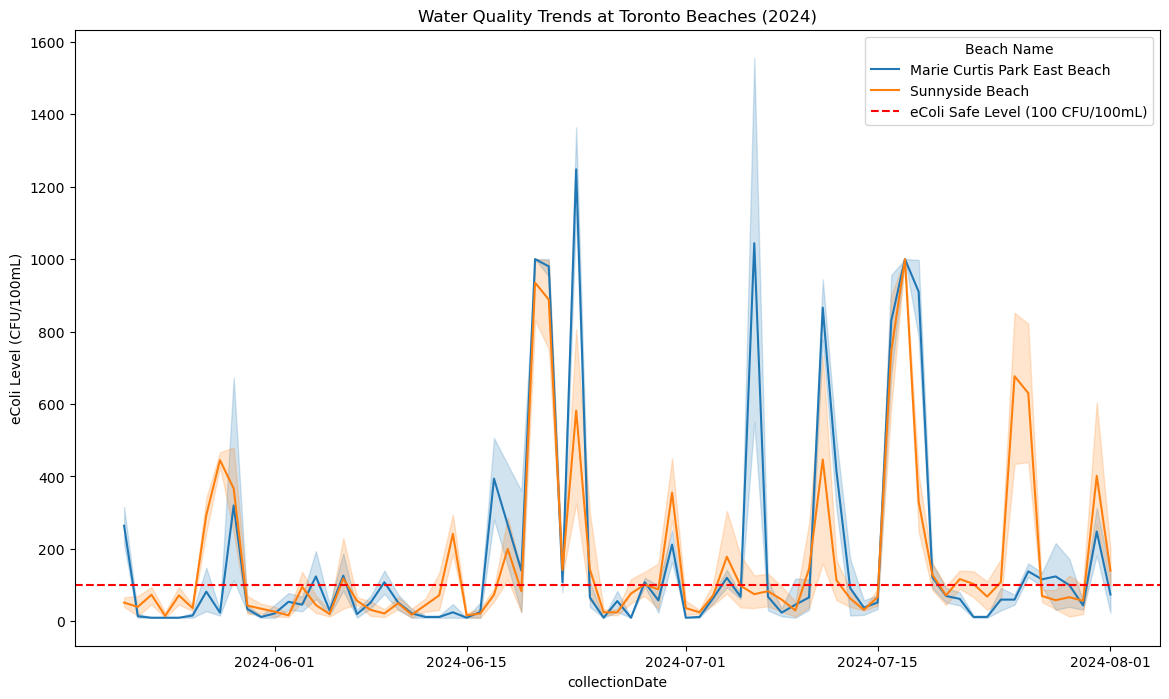

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime (replace 'Date' with the actual column name)
df['collectionDate'] = pd.to_datetime(df['collectionDate'])

# Filter data for a specific year,2024
df_2024 = df[df['collectionDate'].dt.year == 2024]

# Create a line plot showing water quality trends at different beaches
plt.figure(figsize=(14, 8))
sns.lineplot(x='collectionDate', y='eColi', hue='beachName', data=df_2024, palette='tab10')
plt.title('Water Quality Trends at Toronto Beaches (2024)')
plt.xlabel('collectionDate')
plt.ylabel('eColi Level (CFU/100mL)')
plt.axhline(y=100, color='r', linestyle='--', label='eColi Safe Level (100 CFU/100mL)')
plt.legend(title='Beach Name')
plt.show()


What software did you use to create your data visualization?
I used Python to create the data visualization.

Who is your intended audience?
The intended audience for this visualization includes beachgoers, environmentalists, and city health officials.

What information or message are you trying to convey with your visualization?
The visualization aims to show trends in water quality, specifically E. Coli levels, at different Toronto beaches over time. This information helps assess the safety of the water for recreational activities and highlights any potential health risks.

What design principles (substantive, perceptual, aesthetic) did you consider when making your visualization? How did you apply these principles? With what elements of your plots?
Substantive: Ensure the plot clearly represents changes in water quality over time.
Perceptual: Use bright colors to represent different beaches and include a clear legend. Use a simple line plot to make trends easy to follow.
Aesthetic: Keep the design clean and straightforward with clear titles and labels. Avoid cluttering the plot with unnecessary details.

How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?
The Python script can be run by anyone with the dataset and the necessary libraries installed. The script should be well-commented to explain each step.

How did you ensure that your data visualization is accessible?
Use high-contrast colors and large, readable fonts. Provide clear explanations for what the plot shows.

Who are the individuals and communities who might be impacted by your visualization?
The visualization impacts city planners by helping them identify areas that require attention. Residents and tourists benefit by being informed about water quality at various beaches.

How did you choose which features of your chosen dataset to include or exclude from your visualization?
Focus on key features like the date, E. Coli levels, and beach names. Exclude any irrelevant or overly technical details.

What ‘underwater labour’ contributed to your final data visualization product?
Efforts include data cleaning, code writing, and ensuring the plot is easy to understandable.